In [32]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import pandas as pd
import seaborn as sns
from images_segmentation import two_level_otsu as tlot
from images_segmentation import dicescore as dsc
from images_segmentation import preprocessing as pp


Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [33]:
# Set ground truth images from N2DH-GOWT1 dataset and N2DL-HeLa dataset to 0 and 1

def binarize(x):
    img = x.copy()

    for o in np.ndindex(img.shape):
        if img[o] > 0: 
           img[o] = 1
        else:
            img[o] = 0
    
    return img

In [34]:
# Preprocessing - Histogram stretching

def stretch(x):
    intensities = []
   
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(x, (2,  98))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
   
    img_max = max(intensities)
    img_min = min(intensities)
    img_stretch = (img-img_min)*(256 / (img_max-img_min))
    return img_stretch

In [35]:
# Load raw images from N2DH-GOWT1-dataset

img_N2DH_GOWT1_1 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t01.tif")
img_N2DH_GOWT1_2 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t21.tif")
img_N2DH_GOWT1_3 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t31.tif")
img_N2DH_GOWT1_4 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t39.tif")
img_N2DH_GOWT1_5 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t52.tif")
img_N2DH_GOWT1_6 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t72.tif")


# Load ground truth images from N2DH-GOWT1-dataset

gt_N2DH_GOWT1_1 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg01.tif")
gt_N2DH_GOWT1_2 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg21.tif")
gt_N2DH_GOWT1_3 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg31.tif")
gt_N2DH_GOWT1_4 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg39.tif")
gt_N2DH_GOWT1_5 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg52.tif")
gt_N2DH_GOWT1_6 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg72.tif")


In [36]:
# Reassign the ground truth images from N2DH-GOWT1 dataset and N2DLHeLa dataset

binary_gt_N2DH_GOWT1_1 = binarize(gt_N2DH_GOWT1_1)
binary_gt_N2DH_GOWT1_2 = binarize(gt_N2DH_GOWT1_2)
binary_gt_N2DH_GOWT1_3 = binarize(gt_N2DH_GOWT1_3)
binary_gt_N2DH_GOWT1_4 = binarize(gt_N2DH_GOWT1_4)
binary_gt_N2DH_GOWT1_5 = binarize(gt_N2DH_GOWT1_5)
binary_gt_N2DH_GOWT1_6 = binarize(gt_N2DH_GOWT1_6)


In [37]:
# Make a copy of all images of each dataset / use as "no preprocessed images"

copy_img_N2DH_GOWT1_1 = img_N2DH_GOWT1_1.copy()
copy_img_N2DH_GOWT1_2 = img_N2DH_GOWT1_2.copy()
copy_img_N2DH_GOWT1_3 = img_N2DH_GOWT1_3.copy()
copy_img_N2DH_GOWT1_4 = img_N2DH_GOWT1_4.copy()
copy_img_N2DH_GOWT1_5 = img_N2DH_GOWT1_5.copy()
copy_img_N2DH_GOWT1_6 = img_N2DH_GOWT1_6.copy()



In [38]:
# Apply median filter to all images of each dataset

median_img_N2DH_GOWT1_1 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_1, 5)
median_img_N2DH_GOWT1_2 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_2, 5)
median_img_N2DH_GOWT1_3 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_3, 5)
median_img_N2DH_GOWT1_4 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_4, 5)
median_img_N2DH_GOWT1_5 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_5, 5)
median_img_N2DH_GOWT1_6 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_6, 5)



In [39]:
# Apply gaussian filter to all images of each dataset

gauss_img_N2DH_GOWT1_1 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_1, 5)
gauss_img_N2DH_GOWT1_2 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_2, 5)
gauss_img_N2DH_GOWT1_3 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_3, 5)
gauss_img_N2DH_GOWT1_4 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_4, 5)
gauss_img_N2DH_GOWT1_5 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_5, 5)
gauss_img_N2DH_GOWT1_6 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_6, 5)




In [40]:
# Apply histogram stretching to all images of each dataset

stretch_img_N2DH_GOWT1_1 = stretch(copy_img_N2DH_GOWT1_1)
stretch_img_N2DH_GOWT1_2 = stretch(copy_img_N2DH_GOWT1_2)
stretch_img_N2DH_GOWT1_3 = stretch(copy_img_N2DH_GOWT1_3)
stretch_img_N2DH_GOWT1_4 = stretch(copy_img_N2DH_GOWT1_4)
stretch_img_N2DH_GOWT1_5 = stretch(copy_img_N2DH_GOWT1_5)
stretch_img_N2DH_GOWT1_6 = stretch(copy_img_N2DH_GOWT1_6)


In [41]:
# Apply median filter and histogram strechting to all images of each dataset

median_stretch_img_N2DH_GOWT1_1 = stretch(median_img_N2DH_GOWT1_1)
median_stretch_img_N2DH_GOWT1_2 = stretch(median_img_N2DH_GOWT1_2)
median_stretch_img_N2DH_GOWT1_3 = stretch(median_img_N2DH_GOWT1_3)
median_stretch_img_N2DH_GOWT1_4 = stretch(median_img_N2DH_GOWT1_4)
median_stretch_img_N2DH_GOWT1_5 = stretch(median_img_N2DH_GOWT1_5)
median_stretch_img_N2DH_GOWT1_6 = stretch(median_img_N2DH_GOWT1_6)


In [42]:
# Apply histogram stretching and median filter to all images of each dataset

stretch_median_img_N2DH_GOWT1_1 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_1, 5)
stretch_median_img_N2DH_GOWT1_2 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_2, 5)
stretch_median_img_N2DH_GOWT1_3 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_3, 5)
stretch_median_img_N2DH_GOWT1_4 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_4, 5)
stretch_median_img_N2DH_GOWT1_5 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_5, 5)
stretch_median_img_N2DH_GOWT1_6 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_6, 5)


In [43]:
# Apply gaussian filter and histogram strechting to all images of each dataset

gauss_stretch_img_N2DH_GOWT1_1 = stretch(gauss_img_N2DH_GOWT1_1)
gauss_stretch_img_N2DH_GOWT1_2 = stretch(gauss_img_N2DH_GOWT1_2)
gauss_stretch_img_N2DH_GOWT1_3 = stretch(gauss_img_N2DH_GOWT1_3)
gauss_stretch_img_N2DH_GOWT1_4 = stretch(gauss_img_N2DH_GOWT1_4)
gauss_stretch_img_N2DH_GOWT1_5 = stretch(gauss_img_N2DH_GOWT1_5)
gauss_stretch_img_N2DH_GOWT1_6 = stretch(gauss_img_N2DH_GOWT1_6)


In [44]:
# Apply histogram stretching and gaussian filter to all images of each dataset

stretch_gauss_img_N2DH_GOWT1_1 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_1, 5)
stretch_gauss_img_N2DH_GOWT1_2 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_2, 5)
stretch_gauss_img_N2DH_GOWT1_3 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_3, 5)
stretch_gauss_img_N2DH_GOWT1_4 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_4, 5)
stretch_gauss_img_N2DH_GOWT1_5 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_5, 5)
stretch_gauss_img_N2DH_GOWT1_6 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_6, 5)



In [45]:
# Apply otsu thresholding to all images of each dataset - no preprocessing

otsu_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding_within(copy_img_N2DH_GOWT1_1 , 256)
otsu_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding_within(copy_img_N2DH_GOWT1_2 , 256)
otsu_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding_within(copy_img_N2DH_GOWT1_3 , 256)
otsu_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding_within(copy_img_N2DH_GOWT1_4 , 256)
otsu_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding_within(copy_img_N2DH_GOWT1_5 , 256)
otsu_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding_within(copy_img_N2DH_GOWT1_6 , 256)



In [46]:
# Apply otsu thresholding to all images of each dataset - median filter

otsu_median_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding_within(median_img_N2DH_GOWT1_1 , 256)
otsu_median_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding_within(median_img_N2DH_GOWT1_2 , 256)
otsu_median_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding_within(median_img_N2DH_GOWT1_3 , 256)
otsu_median_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding_within(median_img_N2DH_GOWT1_4 , 256)
otsu_median_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding_within(median_img_N2DH_GOWT1_5 , 256)
otsu_median_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding_within(median_img_N2DH_GOWT1_6 , 256)



In [47]:
# Apply otsu thresholding to all images of each dataset - gaussian filter
otsu_gauss_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding_within(gauss_img_N2DH_GOWT1_1 , 256)
otsu_gauss_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding_within(gauss_img_N2DH_GOWT1_2 , 256)
otsu_gauss_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding_within(gauss_img_N2DH_GOWT1_3 , 256)
otsu_gauss_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding_within(gauss_img_N2DH_GOWT1_4 , 256)
otsu_gauss_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding_within(gauss_img_N2DH_GOWT1_5 , 256)
otsu_gauss_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding_within(gauss_img_N2DH_GOWT1_6 , 256)




In [48]:
# Apply otsu thresholding to all images of each dataset - histogram stretching
otsu_stretch_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding_within(stretch_img_N2DH_GOWT1_1 , 256)
otsu_stretch_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding_within(stretch_img_N2DH_GOWT1_2 , 256)
otsu_stretch_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding_within(stretch_img_N2DH_GOWT1_3 , 256)
otsu_stretch_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding_within(stretch_img_N2DH_GOWT1_4 , 256)
otsu_stretch_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding_within(stretch_img_N2DH_GOWT1_5 , 256)
otsu_stretch_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding_within(stretch_img_N2DH_GOWT1_6 , 256)



In [49]:
# Apply otsu thresholding to all images of each dataset - median filter and histogram stretching

otsu_median_stretch_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding_within(median_stretch_img_N2DH_GOWT1_1 , 256)
otsu_median_stretch_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding_within(median_stretch_img_N2DH_GOWT1_2 , 256)
otsu_median_stretch_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding_within(median_stretch_img_N2DH_GOWT1_3 , 256)
otsu_median_stretch_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding_within(median_stretch_img_N2DH_GOWT1_4 , 256)
otsu_median_stretch_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding_within(median_stretch_img_N2DH_GOWT1_5 , 256)
otsu_median_stretch_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding_within(median_stretch_img_N2DH_GOWT1_6 , 256)




In [50]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and median filter

otsu_stretch_median_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding_within(stretch_median_img_N2DH_GOWT1_1 , 256)
otsu_stretch_median_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding_within(stretch_median_img_N2DH_GOWT1_2 , 256)
otsu_stretch_median_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding_within(stretch_median_img_N2DH_GOWT1_3 , 256)
otsu_stretch_median_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding_within(stretch_median_img_N2DH_GOWT1_4 , 256)
otsu_stretch_median_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding_within(stretch_median_img_N2DH_GOWT1_5 , 256)
otsu_stretch_median_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding_within(stretch_median_img_N2DH_GOWT1_6 , 256)



In [51]:
# Apply otsu thresholding to all images of each dataset - gaussian filter and histogram stretching

otsu_gauss_stretch_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding_within(gauss_stretch_img_N2DH_GOWT1_1 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding_within(gauss_stretch_img_N2DH_GOWT1_2 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding_within(gauss_stretch_img_N2DH_GOWT1_3 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding_within(gauss_stretch_img_N2DH_GOWT1_4 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding_within(gauss_stretch_img_N2DH_GOWT1_5 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding_within(gauss_stretch_img_N2DH_GOWT1_6 , 256)



In [52]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and gaussian filter

otsu_stretch_gauss_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding_within(stretch_gauss_img_N2DH_GOWT1_1 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding_within(stretch_gauss_img_N2DH_GOWT1_2 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding_within(stretch_gauss_img_N2DH_GOWT1_3 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding_within(stretch_gauss_img_N2DH_GOWT1_4 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding_within(stretch_gauss_img_N2DH_GOWT1_5 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding_within(stretch_gauss_img_N2DH_GOWT1_6 , 256)



In [53]:
# Dice score - N2DH-GOWT1-dataset
## no preprocessing

N2DH_GOWT1_no_preprocessing = []

dice_otsu_img_N2DH_GOWT1_1 = dsc.dice(otsu_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_img_N2DH_GOWT1_2 = dsc.dice(otsu_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_img_N2DH_GOWT1_3 = dsc.dice(otsu_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_img_N2DH_GOWT1_4 = dsc.dice(otsu_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_img_N2DH_GOWT1_5 = dsc.dice(otsu_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_img_N2DH_GOWT1_6 = dsc.dice(otsu_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_no_preprocessing.extend([dice_otsu_img_N2DH_GOWT1_1 , dice_otsu_img_N2DH_GOWT1_2 , dice_otsu_img_N2DH_GOWT1_3 , dice_otsu_img_N2DH_GOWT1_4 , dice_otsu_img_N2DH_GOWT1_5 , dice_otsu_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_no_preprocessing)


[0.278076857380293, 0.745692237217661, 0.7818812453546948, 0.7545519341670447, 0.7540217593453599, 0.7841191962191998]


In [54]:
# Dice score - N2DH-GOWT1-dataset
## median filter

N2DH_GOWT1_median_filter = []

dice_otsu_median_img_N2DH_GOWT1_1 = dsc.dice(otsu_median_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_median_img_N2DH_GOWT1_2 = dsc.dice(otsu_median_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_median_img_N2DH_GOWT1_3 = dsc.dice(otsu_median_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_median_img_N2DH_GOWT1_4 = dsc.dice(otsu_median_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_median_img_N2DH_GOWT1_5 = dsc.dice(otsu_median_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_median_img_N2DH_GOWT1_6 = dsc.dice(otsu_median_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_median_filter.extend([dice_otsu_median_img_N2DH_GOWT1_1 , dice_otsu_median_img_N2DH_GOWT1_2 , dice_otsu_median_img_N2DH_GOWT1_3 , dice_otsu_median_img_N2DH_GOWT1_4 , dice_otsu_median_img_N2DH_GOWT1_5 , dice_otsu_median_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter)

[0.851950360965538, 0.7900118541007514, 0.77141421967188, 0.7937942983146953, 0.9001486787862405, 0.9068641573598613]


In [55]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter

N2DH_GOWT1_gaussian_filter = []

dice_otsu_gauss_img_N2DH_GOWT1_1 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_gauss_img_N2DH_GOWT1_2 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_gauss_img_N2DH_GOWT1_3 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_gauss_img_N2DH_GOWT1_4 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_gauss_img_N2DH_GOWT1_5 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_gauss_img_N2DH_GOWT1_6 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_gaussian_filter.extend([dice_otsu_gauss_img_N2DH_GOWT1_1 , dice_otsu_gauss_img_N2DH_GOWT1_2 , dice_otsu_gauss_img_N2DH_GOWT1_3 , dice_otsu_gauss_img_N2DH_GOWT1_4 , dice_otsu_gauss_img_N2DH_GOWT1_5 , dice_otsu_gauss_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter)


[0.8231434457960972, 0.7715760393058612, 0.7817189190935375, 0.771347006351687, 0.8463062764724419, 0.8210399032648126]


In [56]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching

N2DH_GOWT1_histogram_stretching = []

dice_otsu_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching.extend([dice_otsu_stretch_img_N2DH_GOWT1_1 , dice_otsu_stretch_img_N2DH_GOWT1_2 , dice_otsu_stretch_img_N2DH_GOWT1_3 , dice_otsu_stretch_img_N2DH_GOWT1_4 , dice_otsu_stretch_img_N2DH_GOWT1_5 , dice_otsu_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching)

[0.278076857380293, 0.2609383555104371, 0.24393510648313446, 0.2602767963373487, 0.3373632903275149, 0.3799143721694078]


In [57]:
# Dice score - N2DH-GOWT1-dataset
## median filter and histogram stretching

N2DH_GOWT1_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_median_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_median_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_median_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_median_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_median_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_N2DH_GOWT1_1 , dice_otsu_median_stretch_img_N2DH_GOWT1_2 , dice_otsu_median_stretch_img_N2DH_GOWT1_3 , dice_otsu_median_stretch_img_N2DH_GOWT1_4 , dice_otsu_median_stretch_img_N2DH_GOWT1_5 , dice_otsu_median_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter_histogram_stretching)

[0.8879245258244319, 0.8695956345319714, 0.841026372737866, 0.8667650552535906, 0.5785096579720489, 0.7926029101293878]


In [58]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and median filter

N2DH_GOWT1_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_median_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_median_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_median_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_median_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_median_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_N2DH_GOWT1_1 , dice_otsu_stretch_median_img_N2DH_GOWT1_2 , dice_otsu_stretch_median_img_N2DH_GOWT1_3 , dice_otsu_stretch_median_img_N2DH_GOWT1_4 , dice_otsu_stretch_median_img_N2DH_GOWT1_5 , dice_otsu_stretch_median_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching_median_filter)

[0.8879245258244319, 0.8695550788172746, 0.841026372737866, 0.8667650552535906, 0.5785096579720489, 0.7926029101293878]


In [59]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter and histogram stretching

N2DH_GOWT1_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter_histogram_stretching)

[0.8322647850295762, 0.8020303817324839, 0.812839616828189, 0.8086292306329511, 0.8346101710404069, 0.8478927105377222]


In [60]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and gaussian filter

N2DH_GOWT1_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_N2DH_GOWT1_1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_2 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_3 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_4 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_5 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching_gaussian_filter)

[0.8401238581425141, 0.8154200178396084, 0.8243922215947758, 0.8187090945454796, 0.8526588581209055, 0.8484809105331839]


/Users/maribelschneider/Documents/Uni/Bachelor - Molekulare Biotechnologie/Vorlesungsunterlagen/weitere Dateien/FS4/Data Analysis/2022-topic-01-team-04/images_segmentation/preprocessing.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Median filter and \n histogram stretching' , 'Histogram stretching and \n median filter' , 'Gaussian filter and \n histogram stretching' , 'Histogram stretching and \n gaussian filter'])


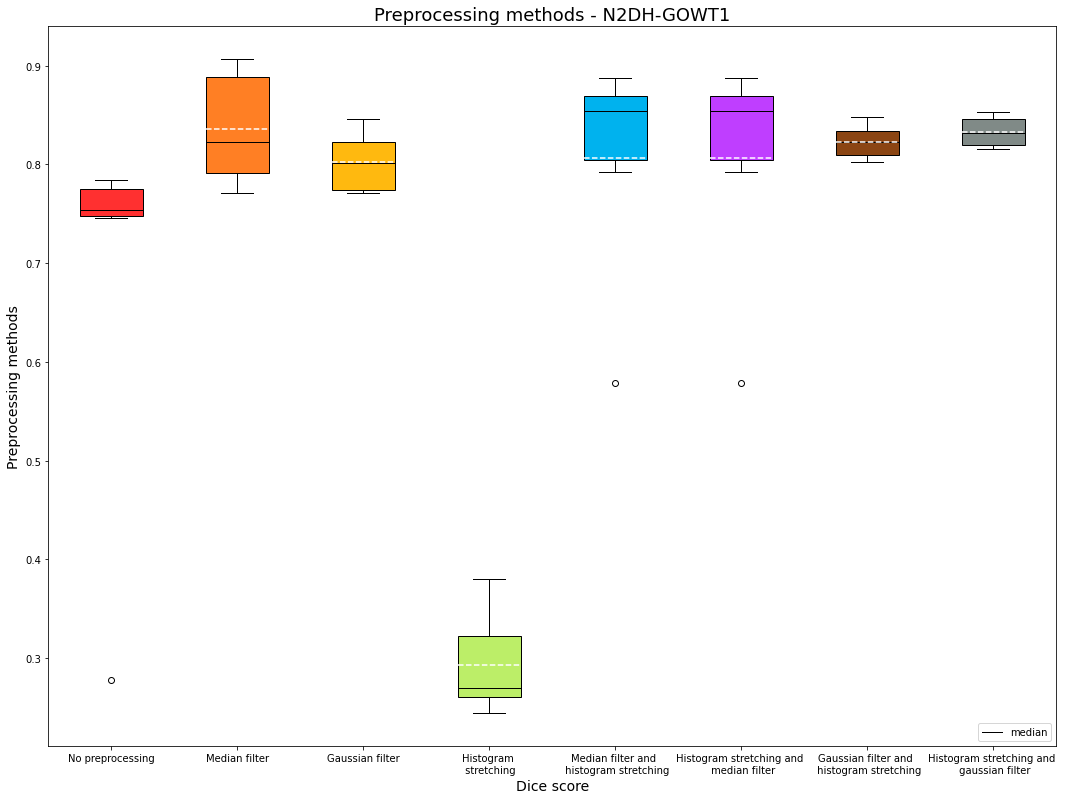

In [61]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot - matplotlib

data_N2DH_GOWT1 = [N2DH_GOWT1_no_preprocessing , N2DH_GOWT1_median_filter , N2DH_GOWT1_gaussian_filter , N2DH_GOWT1_histogram_stretching , N2DH_GOWT1_median_filter_histogram_stretching , N2DH_GOWT1_histogram_stretching_median_filter , N2DH_GOWT1_gaussian_filter_histogram_stretching , N2DH_GOWT1_histogram_stretching_gaussian_filter]
pp.dataset_boxplot(data_N2DH_GOWT1 , 'Preprocessing methods - N2DH-GOWT1')
